In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
from keras import regularizers
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PCA_output_22july.csv")

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
0,0,-8.706827,-4.339190,-4.180036,4.212530,0.882604,-0.391934,7.763384,7.204998,-0.499726,...,-0.825974,0.535383,1.194621,-0.188940,-1.618302,0.448730,0.394859,0.068365,-0.367957,-0.288764
1,1,0.512480,2.895134,-7.755316,1.471904,-3.244839,7.041634,1.511138,-5.627420,-1.840403,...,3.140199,-1.372110,1.199871,-2.160086,1.208585,3.552791,4.351152,-0.284990,-1.358902,-0.717233
2,2,-9.623844,-3.837350,0.259920,3.200098,0.916932,-0.789431,6.362865,-3.370701,-0.713113,...,-0.700247,0.642108,1.370315,-0.001497,-1.090686,0.617543,0.170844,-0.146501,-0.498314,-0.526266
3,3,4.177739,0.043942,0.811193,0.786569,-4.303962,7.003255,-1.304247,-2.150142,0.803922,...,2.368025,2.233662,3.673938,4.256667,-0.324745,0.938214,1.886685,0.777780,0.269531,0.725476
4,4,18.448381,-6.148126,-10.818271,0.351719,3.177688,-3.615830,-1.801479,-0.157590,-1.294293,...,2.282110,-1.148650,0.606627,-0.125223,1.268335,2.354189,1.293222,-0.903653,-1.032513,-1.651606


In [ ]:
len(df)

845086

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
train = df.iloc[:676069]

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-8.706827,-4.339190,-4.180036,4.212530,0.882604,-0.391934,7.763384,7.204998,-0.499726,2.654979,...,-0.825974,0.535383,1.194621,-0.188940,-1.618302,0.448730,0.394859,0.068365,-0.367957,-0.288764
1,0.512480,2.895134,-7.755316,1.471904,-3.244839,7.041634,1.511138,-5.627420,-1.840403,2.954020,...,3.140199,-1.372110,1.199871,-2.160086,1.208585,3.552791,4.351152,-0.284990,-1.358902,-0.717233
2,-9.623844,-3.837350,0.259920,3.200098,0.916932,-0.789431,6.362865,-3.370701,-0.713113,-3.942008,...,-0.700247,0.642108,1.370315,-0.001497,-1.090686,0.617543,0.170844,-0.146501,-0.498314,-0.526266
3,4.177739,0.043942,0.811193,0.786569,-4.303962,7.003255,-1.304247,-2.150142,0.803922,2.601226,...,2.368025,2.233662,3.673938,4.256667,-0.324745,0.938214,1.886685,0.777780,0.269531,0.725476
4,18.448381,-6.148126,-10.818271,0.351719,3.177688,-3.615830,-1.801479,-0.157590,-1.294293,1.832637,...,2.282110,-1.148650,0.606627,-0.125223,1.268335,2.354189,1.293222,-0.903653,-1.032513,-1.651606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676064,8.963407,-6.446794,17.276598,-9.481212,-4.790199,-5.127367,4.592448,-0.932486,0.726362,0.284673,...,-0.060184,0.001150,0.020204,0.001455,-0.014744,0.012813,0.026431,-0.035388,0.029800,0.017115
676065,6.579287,3.543696,-1.212468,-1.802592,-2.164026,11.212375,1.703327,-4.224643,-12.661961,-6.666725,...,-0.130173,-0.314600,-0.183291,0.267483,0.002816,-0.134788,-0.087458,0.102111,-0.071200,0.111468
676066,-9.756791,-6.572397,-1.274767,-7.474907,3.400561,1.580727,-6.207051,2.764644,1.883076,5.165613,...,-0.051246,-0.112668,0.057672,-0.002275,0.061505,0.076037,0.011458,0.023194,-0.012380,-0.020018
676067,19.280930,-9.395131,-10.451735,2.551103,6.622082,-5.814367,-2.547875,-0.240556,-1.393488,-0.688689,...,0.017615,-0.008599,0.034786,-0.040697,-0.004188,-0.053143,-0.020572,0.023416,0.000897,0.033576


In [ ]:
test=df.iloc[604645:]

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
604645,-3.630238,9.351609,0.336226,-0.666854,11.444552,-0.481413,2.617491,-9.407233,3.800022,1.811882,...,-0.066066,-0.013967,0.009189,-0.074314,-0.050209,0.020112,-0.005991,0.029604,-0.009270,0.017694
604646,-10.193856,-3.382955,-0.129894,3.944828,1.296398,-1.375697,7.891686,-2.367427,-0.865997,-4.498686,...,0.075365,-0.002223,-0.055495,-0.043653,0.099471,-0.087080,-0.049007,-0.010251,-0.106801,0.001739
604647,19.280930,-9.395131,-10.451735,2.551103,6.622082,-5.814367,-2.547875,-0.240556,-1.393488,-0.688689,...,0.017615,-0.008599,0.034786,-0.040697,-0.004188,-0.053143,-0.020572,0.023416,0.000897,0.033576
604648,-8.948345,-3.935732,-4.460630,4.883306,1.135193,-1.208819,9.235802,8.037947,-0.448921,2.298948,...,-0.047274,-0.010654,0.014905,0.042991,-0.000098,-0.003496,0.036100,-0.006910,0.010023,-0.043145
604649,-3.594596,-2.838918,5.427036,15.776087,-8.225675,-2.476162,-6.975190,-2.834174,3.196235,0.447400,...,0.009583,0.003781,-0.034178,-0.030446,-0.044104,0.015861,-0.051820,0.009577,0.011927,-0.016556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845081,8.963408,-6.446795,17.276599,-9.481213,-4.790198,-5.127368,4.592448,-0.932486,0.726361,0.284673,...,-0.060184,0.001150,0.020204,0.001455,-0.014745,0.012813,0.026431,-0.035388,0.029800,0.017115
845082,3.549017,13.286011,9.818342,2.773638,7.845759,0.235868,-4.821548,8.032083,-2.054149,-2.335532,...,0.039628,0.092506,-0.018841,0.014740,-0.010510,-0.030838,-0.056699,-0.009858,-0.012129,-0.018363
845083,-3.630239,9.351609,0.336225,-0.666854,11.444555,-0.481412,2.617490,-9.407233,3.800025,1.811883,...,-0.066065,-0.013968,0.009188,-0.074314,-0.050210,0.020111,-0.005990,0.029605,-0.009270,0.017695
845084,-9.756793,-6.572398,-1.274767,-7.474909,3.400563,1.580727,-6.207052,2.764644,1.883077,5.165615,...,-0.051246,-0.112667,0.057673,-0.002277,0.061505,0.076036,0.011459,0.023193,-0.012381,-0.020016


In [ ]:
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (676069, 45)
Test dataset shape: (240441, 45)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (676069, 1, 45)
Test data shape: (240441, 1, 45)


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(X_train.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               89088     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 45)            5805      
 ibuted)                                                

In [ ]:
history = model.fit(X_train, X_train, epochs=12, batch_size=10, validation_split=0.05, verbose=1)

Epoch 1/12
64227/64227 [==============================] - 301s 5ms/step - loss: 0.0205 - val_loss: 0.0056
Epoch 2/12
64227/64227 [==============================] - 297s 5ms/step - loss: 0.0153 - val_loss: 0.0051
Epoch 3/12
64227/64227 [==============================] - 296s 5ms/step - loss: 0.0146 - val_loss: 0.0049
Epoch 4/12
64227/64227 [==============================] - 300s 5ms/step - loss: 0.0141 - val_loss: 0.0041
Epoch 5/12
64227/64227 [==============================] - 297s 5ms/step - loss: 0.0139 - val_loss: 0.0048
Epoch 6/12
64227/64227 [==============================] - 296s 5ms/step - loss: 0.0137 - val_loss: 0.0040
Epoch 7/12
64227/64227 [==============================] - 299s 5ms/step - loss: 0.0135 - val_loss: 0.0039
Epoch 8/12
64227/64227 [==============================] - 296s 5ms/step - loss: 0.0134 - val_loss: 0.0047
Epoch 9/12
64227/64227 [==============================] - 300s 5ms/step - loss: 0.0133 - val_loss: 0.0040
Epoch 10/12
64227/64227 [=====================

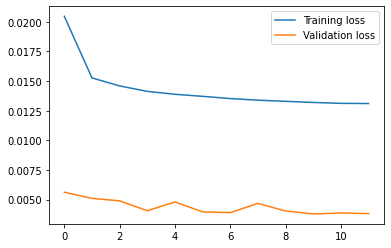

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.2)

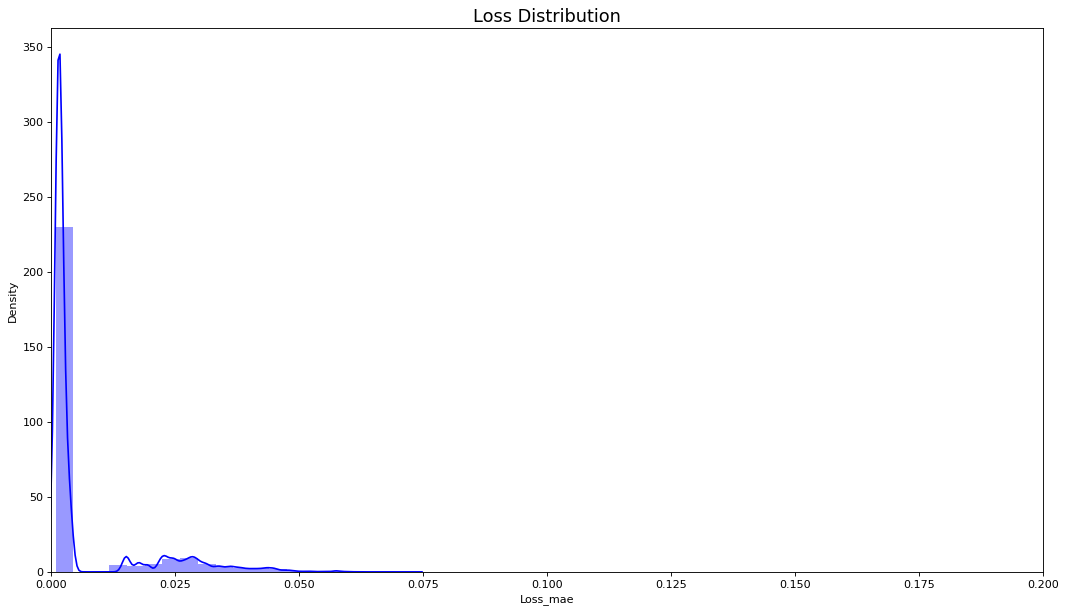

In [ ]:
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.2])

In [ ]:
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
604645,0.000874,0.06,False
604646,0.001964,0.06,False
604647,0.002383,0.06,False
604648,0.001798,0.06,False
604649,0.001626,0.06,False


In [ ]:
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.06
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [ ]:
scored.shape

(916510, 3)

In [ ]:
model.save("model lstm_22ndjuly.h5")